# Predicting the Modern Adjusted Three Point Percentages of Past NBA Players 

### Tyler Beckmann

# Abstract:
This project aims to predict the 3-Point shooting percentages of historic NBA players when adjusted for the modern era of the NBA. This project uses data from every player in every season since 1959, which is well before the inclusion of the 3-point line in 1979. By analyzing the recent 15 years of the NBA, we can create an AI regression model where a players season 3P% can be predicted. The model chosen for this Random Forest Regression and features are selected through a process of exploratory data analysis. The model is fined tuned to hyperparameters to create a model with a Mean Absolute error of ~0.02. The model is then applied to historic NBA players such as Kareem Abdul-Jabbar and Michael Jordan to get an idea of what their 3P% might have been if they played in a more modernized NBA. 

A link to this project on github can be found here: https://github.com/tmoneybecks/NBA_3Point.git

A Link to the Page can be found here: https://tmoneybecks.github.io/NBA_3Point/


# Overview of motivation:
The game of basketball has changed a lot in the past decade. The 3-point shot is increasingly popular and NBA players take a higher volume of 3-point shots more than ever before. For game historians (people who like to analyze past players), the 3-point shot is hard to asses for players from the past. The 3-point shot was not even instilled until 1979. A big question today is how certain legends of the past would have performed in today’s 3-point shot era, and what would his 3-point percentage be. For example, Kareen Abdul-Jabbar is one of the best players of all time, but spent their prime during the 1970s before the 3-point line. He has only attempted 22 3-point shots in his career. If he were to play today, his statistics would look very different than what they actually were. A question many NBA followers have is how good would Kareem be in the modern NBA, and how well would he do shooting the 3-point shot. Using trends found in a dataset, I believe we can create a projection of how past players would have done in today’s NBA.

Dataset: The dataset I have chosen is the NBA Basketball Season Stats dataset from Kaggle (https://www.kaggle.com/datasets/blitzapurv/nba-players-data-1950-to-2021?select=seasons_stats.csv).
 
This dataset includes the statistics of every player in each of their seasons from 1950-2022. For example, an entry would include the year (1950-2022), the player’s name, and about 50 statistics that player had in the specified year. Some of the statistics include games played, points made, shots attempted, 3-point shots etc. The purpose of this repository is to keep the statistical performance of each player in each year. This can be used to look at trends in the game, and also what players are effective in certain aspects of the game. One stakeholder is the team that employs a player. Using this dataset, the team can determine how each player gets played, how effective they are, and perhaps how much they should get paid. General managers of each team can use this data to determine trades, and how to put together a team. People who love the history of basketball can use this data to remember certain important seasons and also rank who they think were the best players. This dataset has 28058 individual seasons with 51 statistics. This makes the dataset 28058 x 50. Since this dataset has so much data, I am not sure anything is missing or can be improved from this.


# Related Work:
Something that inspired me to do NBA themed task it because I listen to many NBA podcasts where past players are compared to current players. However the data for the past players is different in certain ways compared to current players, such as 3-point shooting. Another thing that inspired me is the discussions from class where we talk about our projects. This made me want to shift from my initial idea of a classification type model to a Random Forest Regression model.

# Initial Questions:
First, the question was how good would Kareem Abdul-Jabbar's 3P% be if adjusted for the modern NBA using a AI classifacation model. This would be a good AI project because 3P% did not exist before 1979. I was going to have a classification model separate the ranges of 3P% into separate bins. This would include bad, below average, above average, and great. This project idea shifted into a regression model. The reason I wanted to change to a regression model is because these numbers are a continous percentage. Also I can gather a MAE to approximate the error. I feel like instead of an arbitraty category, I could have a clear and calculatred number. Finally, this question shifted from not just only Kareem, but also any other legend of the past not used in the training model. For example, Michael Jordan can also be analyzed to see how his 3P% would change in the modern NBA.

# Data: 
First, we exploare the data and import any tools we might need.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


train_data = pd.read_csv("../data/seasons_stats.csv")
train_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


We can see that the years start from 1950, and we have a lot of NaN values. This is due to certain stats not beeing kept in the earlier years (such as Steals and Blocks) and also because the 3 point line was not invented until 1979. To visualize how the game has changed, we can look at Year vs 3-point shots attempted.

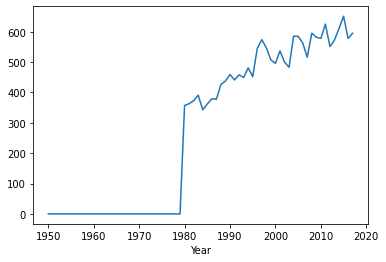

In [2]:
showdf = train_data.groupby("Year")["3PA"].count()
showdf.plot()
plt.show()

Looking at the total 3 point attempts per year, we can see here that the 3-point shot has continurally trending to increase since its inception in 1979. For cleaning the data, there are some unused columns that need to be filtered out.

In [3]:
train_data = train_data.drop('blanl', axis=1)
train_data = train_data.drop('blank2', axis=1)
train_data = train_data.drop('Unnamed: 0', axis=1)

Next, let's store Kareem's seasons into a new data frame for later testing. Also let's store some other MVP seasons from current players.

In [4]:
lebron = train_data[train_data.Player == 'LeBron James']
curry  = train_data[train_data.Player == 'Stephen Curry']
rus    = train_data[train_data.Player == 'Russell Westbrook']
giannis = train_data[train_data.Player == 'Giannis Antetokounmpo']
joker  = train_data[train_data.Player == 'Nikola Jokic']
harden = train_data[train_data.Player == 'James Harden']
kd     = train_data[train_data.Player == 'Kevin Durant']
mj     = train_data[train_data.Player == 'Michael Jordan*']
logo   = train_data[train_data.Player == 'Jerry West*']

kareem = train_data[train_data.Player == 'Kareem Abdul-Jabbar*']
kareem.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2868,1970.0,Kareem Abdul-Jabbar*,C,22.0,MIL,82.0,NaN,3534.0,22.5,0.552,...,0.653,NaN,NaN,1190.0,337.0,NaN,NaN,NaN,283.0,2361.0
3070,1971.0,Kareem Abdul-Jabbar*,C,23.0,MIL,82.0,NaN,3288.0,29.0,0.606,...,0.690,NaN,NaN,1311.0,272.0,NaN,NaN,NaN,264.0,2596.0
3316,1972.0,Kareem Abdul-Jabbar*,C,24.0,MIL,81.0,NaN,3583.0,29.9,0.603,...,0.689,NaN,NaN,1346.0,370.0,NaN,NaN,NaN,235.0,2822.0
3582,1973.0,Kareem Abdul-Jabbar*,C,25.0,MIL,76.0,NaN,3254.0,28.5,0.580,...,0.713,NaN,NaN,1224.0,379.0,NaN,NaN,NaN,208.0,2292.0
3852,1974.0,Kareem Abdul-Jabbar*,C,26.0,MIL,81.0,NaN,3548.0,24.4,0.564,...,0.702,287.0,891.0,1178.0,386.0,112.0,283.0,NaN,238.0,2191.0


# Exploatory Data Analysis:
For further data cleaning, since we need to train our train_data set, we need to filter out information that will skew the results. Using the chart above, we need to filter out all seasons before 1979, and also all seasons before 2007. 2007 is the season is a year noted as the start of the 3-point shot era and using data before this year may not be representitive as "modern Basketball". We will also filter out players seasons who have taken less that 100 3-point shots. This is because they have not taken enough shots for their shooting percentage to be a true indication of how well they can shoot a 3-point shot. We will also be taking out the slim number of outliers as these might skew our training. We can see what the data looks like before and after the pruning. After this pruning, there are no NaN or missing values in this dataset. See more below.

array([[<AxesSubplot: title={'center': '3P%'}>]], dtype=object)

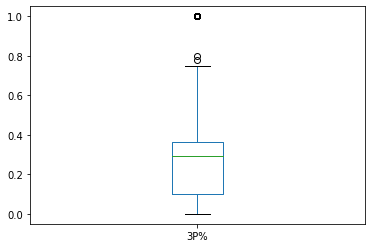

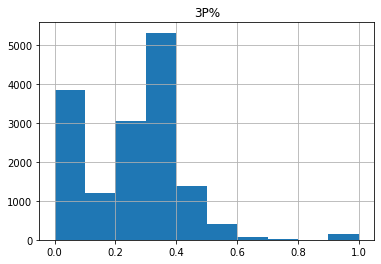

In [5]:
train_data.boxplot(column =['3P%'], grid = False)
train_data.hist(column='3P%')

In [6]:
from scipy import stats
train_data = train_data.loc[train_data["Year"] > 2007]
train_data = train_data.loc[train_data["3PA"] > 100]
train_data = train_data[(np.abs(stats.zscore(train_data['3P%'])) < 3)]
train_data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
18753,2008.0,Ray Allen,SG,32.0,BOS,73.0,73.0,2624.0,16.4,0.584,...,0.907,75.0,193.0,268.0,225.0,65.0,16.0,127.0,147.0,1273.0
18757,2008.0,Rafer Alston,PG,31.0,HOU,74.0,74.0,2526.0,13.2,0.492,...,0.715,28.0,232.0,260.0,392.0,98.0,18.0,160.0,139.0,969.0
18761,2008.0,Carmelo Anthony,SF,23.0,DEN,77.0,77.0,2806.0,21.1,0.568,...,0.786,178.0,393.0,571.0,259.0,98.0,39.0,253.0,253.0,1978.0
18772,2008.0,Kelenna Azubuike,SG,24.0,GSW,81.0,17.0,1732.0,13.5,0.534,...,0.717,107.0,217.0,324.0,75.0,45.0,34.0,58.0,159.0,692.0
18774,2008.0,Marcus Banks,PG,26.0,TOT,36.0,3.0,569.0,12.6,0.579,...,0.771,4.0,41.0,45.0,61.0,14.0,13.0,37.0,65.0,239.0


array([[<AxesSubplot: title={'center': '3P%'}>]], dtype=object)

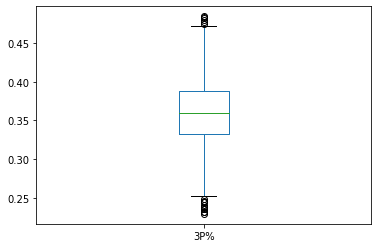

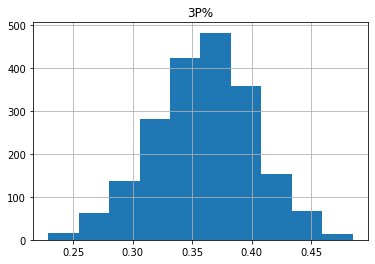

In [7]:
train_data.boxplot(column =['3P%'], grid = False)
train_data.hist(column='3P%')

We can see after this pruning that the data looks a lot more normal and a better model can be achieved.

### EDA (Continued): 
Since we are using AI for this problem, it is important to analyze the variables and determine what the important ones are to include in the model. If we use too many variables, this can lead to overfitting, too little will lead to underfitting. There are a lot of variables in this dataset (50). It is extremely important we determine the most important ones by visualization techniques. First, I want to see how a player's position may impact 3-point percentage.

<AxesSubplot: title={'center': '3P%'}, xlabel='Pos'>

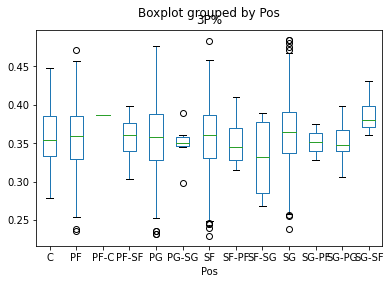

In [8]:
train_data.boxplot(by ='Pos', column =['3P%'], grid = False)

To me, this chart tells us that perhaps posisiton is not a good indicator of shooting percentage. There are a lot of designated positions and I think this will lead to overfitting. Another variable I want to explore is True Shooting percentage. True shooting percentage is supposed to determine how good a player is at shooting the ball regardless of field posistion. This includes 3-point and 2-point and free throws. I think this is valuable because it can be used in every era, even be calculated before the 3-point line in 1979.

0.6398574752921791


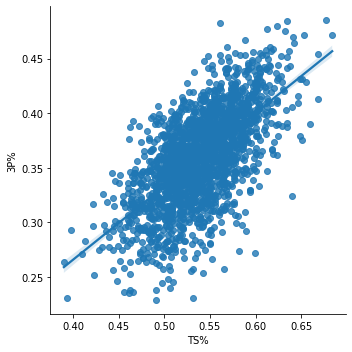

In [9]:
import seaborn as sns
sns.lmplot(x='TS%',y='3P%',data=train_data,fit_reg=True)
column_1 = train_data["TS%"]
column_2 = train_data["3P%"]
correlation = column_1.corr(column_2)
print(correlation)

It seems like TS% is a good indicator of 3p% and should be used in our model. Effective Field goal percentage is similar to True Shooting as it mesaures how good a player can shoot the basketball. The one issue with both True Shooting and Effective Field Goal percentage is that dunks and layups are worth the same as a long range shot, so shooting from distance is not as accurate as 3P%, but we still should see some correlations. Players who will not fall in this correlation are players who primarily dunk the ball or score from really close.

0.7092821398702179


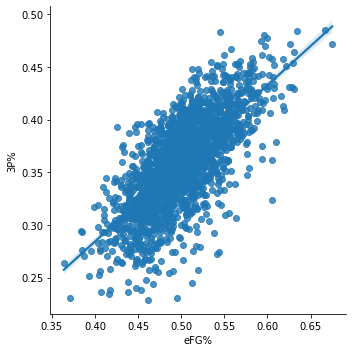

In [10]:
import seaborn as sns
sns.lmplot(x='eFG%',y='3P%',data=train_data,fit_reg=True)
column_1 = train_data["eFG%"]
column_2 = train_data["3P%"]
correlation = column_1.corr(column_2)
print(correlation)

It seems like eFG% is slightly better correlated for 3P% than TS% is. One other shooting metric to study is Free Throw percentage. This is a shot from a fixed location with no defenders. It determines how good of a shooter you are from a specific spot. This might correlate well to 3P%.

0.24484138789654167


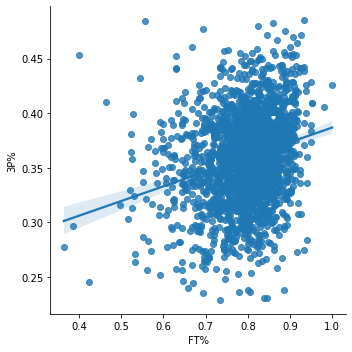

In [11]:
sns.lmplot(x='FT%',y='3P%',data=train_data,fit_reg=True)
column_1 = train_data["FT%"]
column_2 = train_data["3P%"]
correlation = column_1.corr(column_2)
print(correlation)

To my suprise, it seems like Free Throw percentage is NOT a good indicator of 3-point percentage. To be honest, I am not sure why, but this is now documented and can be avoided in our model. Lastly, I want to look at the correlation of 2P% to 3P%.

0.050861505892977554


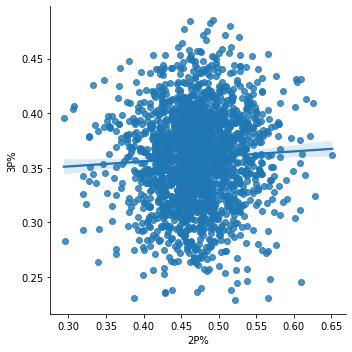

In [12]:
sns.lmplot(x='2P%',y='3P%',data=train_data,fit_reg=True)
column_1 = train_data["2P%"]
column_2 = train_data["3P%"]
correlation = column_1.corr(column_2)
print(correlation)

There is very little correlation here. I believe it is because the 2-Point shot can mean many different things and is a very different type of shot than the 3-pointer.

Surprises: The most suprising result to me was how FT% did not correlate well to 3P%. FT% is just simply how well a player can shoot from the free throw line. I thought this would be very indicitave of 3P%, but it was not. I am also suprised that after pruing the data, I still have a bunch of outliers for 3p%. Perhaps further pruning can help rid of these outliers. For example, shooting over 50% from 3-point range is unrealisitic and should not be an expectation of the model. The visualization of these surprises are in the 2P% scatter plot and the 3p% box plot.

# Final Analysis:
We can look at a player’s field goal percentage, free throw percentage, and many of the other 50 statistics from a dataset (predictor variables) and predict what his 3-point percentage (response variable) would be in today’s game. A regression AI model can be used. For this research question, I am using a Machine Learning/AI model where the past decade is the training set, and using the model to predict players 3-point percentage from an earlier year. An accurate model would serve as a great analysis tool for comparing players between eras. I am using a Random Forest Regression model to answer this question. The specific predictor variables are ['3P%', 'MP', 'PER', 'TS%', 'FTr', 'FG%', 'eFG%', 'FT', 'FTA', 'FT%', 'PTS', 'FG', 'FGA'  ], and the response variable is 3P%. 




Now we want to keep only the features we think are useful for the train data. Then split the data into training and validation.

In [13]:
features = ['3P%', 'MP', 'PER', 'TS%', 'FTr', 'FG%', 'eFG%', 'FT', 'FTA', 'FT%', 'PTS', 'FG', 'FGA'  ]
train_data = train_data[features]
reg_train_data = train_data

#split into train and validation
reg_train,reg_validation = train_test_split(reg_train_data,test_size=0.2)
y_reg_train = reg_train["3P%"]
X_reg_train = reg_train.drop('3P%', axis = 1)
y_reg_validation = reg_validation["3P%"]
X_reg_validation = reg_validation.drop('3P%', axis=1)

Below we can see that I used Random Forest. For choosing the features, I used the EDA from above on what seemed like would have strong correlations.

Prelimnary (initial) Results:
Next we want to use this train and validation data to train a Random Forest Regression model and find the Mean Average Error.

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_reg_train, y_reg_train)  

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = regressor.predict(X_reg_validation)
rf_val_mae = mean_absolute_error(rf_val_predictions, y_reg_validation)
rf_val_mse = mean_squared_error(rf_val_predictions, y_reg_validation)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))
print("Validation MSE for Random Forest Model: {}".format(rf_val_mse))

Validation MAE for Random Forest Model: 0.021133358395989968
Validation MSE for Random Forest Model: 0.0007205896573934835


Here we see that we expect to be around 2% MAE for the 3P%, and .07% MSE. MAE is a better metric for this model because the predicted result can be above and below the actual result which will equalize the MSE. Next we visualize the accuracy of this model by plotting the predicted 3p% vs the actual 3p% in a scatter plot. Then we plot the line of best fit (blue line). Then we plot the actual vs the actual (black line) to see what the actual correct line is. 



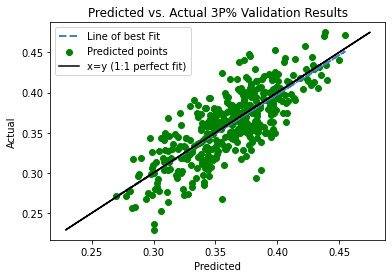

Accuracy:  0.9779078412477855    0.006420016034547751


In [41]:
#find line of best fit

a, b = np.polyfit(rf_val_predictions, y_reg_validation, 1)

#add line of best fit to plot
plt.plot(rf_val_predictions, a*rf_val_predictions+b, color='steelblue', linestyle='--', linewidth=2, label = "Line of best Fit")

plt.scatter(rf_val_predictions, y_reg_validation, color='g', label = "Predicted points") 

plt.plot(y_reg_validation, y_reg_validation,color='k', label= "x=y (1:1 perfect fit)") 
plt.legend(loc="upper left")
plt.xlabel('Predicted')
plt.ylabel('Actual') 

plt.title('Predicted vs. Actual 3P% Validation Results')
plt.show()

#show difference in slope. a slope of 1 is perfect. Divide the slopes for an accuracy
print("Accuracy: ", a, "  ", b)

As we can see the line of best fit slope is very close to 1, which is desireable. The MAE is around .02, which means on average the model is getting within 2 percentage points from the actual value. Some tuning involved changing of features and changing the hyperparameters of the Random Forest Regressor such as random state and n_estimators. I tried making the test/train split different. I tried 15/85, and 30/70 and each time I ran the model the 3P% MAE was still within a single percent of the MAE above. Now, let us predict what Kareem's 3P% would be from year to year. We can also look at what other key players 3P% is with our model.

In [19]:
kareem_model = kareem[['MP', 'PER', 'TS%', 'FTr', 'FG%', 'eFG%', 'FT', 'FTA', 'FT%', 'PTS', 'FG', 'FGA'  ]]
mj_model     = mj[['MP', 'PER', 'TS%', 'FTr', 'FG%', 'eFG%', 'FT', 'FTA', 'FT%', 'PTS', 'FG', 'FGA'  ]]
logo_model   = logo[['MP', 'PER', 'TS%', 'FTr', 'FG%', 'eFG%', 'FT', 'FTA', 'FT%', 'PTS', 'FG', 'FGA'  ]]
kd_model     = kd[['MP', 'PER', 'TS%', 'FTr', 'FG%', 'eFG%', 'FT', 'FTA', 'FT%', 'PTS', 'FG', 'FGA'  ]]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7e694a0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc7e694a5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc7e692bca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc7e694ab20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7e694adc0>],
 'means': []}

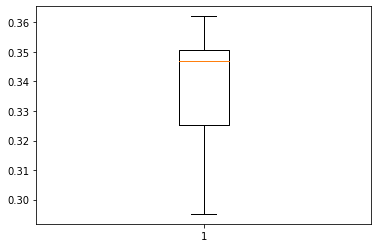

In [20]:
kareem_predictions = regressor.predict(kareem_model)
mj_predictions = regressor.predict(mj_model)
logo_predictions = regressor.predict(logo_model)
kd_predictions = regressor.predict(kd_model)
plt.boxplot(kareem_predictions)


/var/folders/f6/9fk8hcqs00gb88n3pkn_zy9c0000gn/T/ipykernel_50900/2660792214.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['All', 'Kareem Pred', 'JW Pred', 'MJ Pred', 'Lebron', 'Curry', 'Westbrook', 'Giannis', 'Jokic', 'Harden', 'KD', 'KD Pred'])


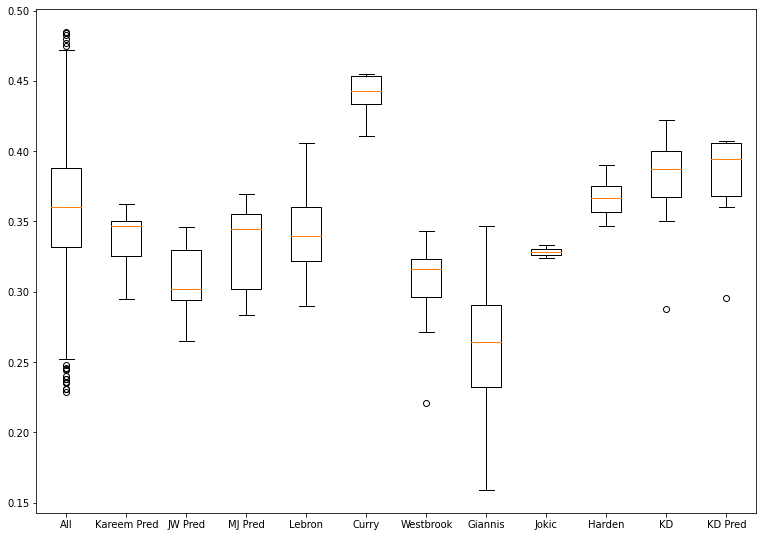

In [21]:
data = [train_data["3P%"], kareem_predictions, logo_predictions, mj_predictions, lebron["3P%"], curry["3P%"], rus["3P%"], giannis["3P%"], joker["3P%"], harden["3P%"], kd["3P%"], kd_predictions ]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])


ax.set_xticklabels(['All', 'Kareem Pred', 'JW Pred', 'MJ Pred', 'Lebron', 'Curry', 'Westbrook', 'Giannis', 'Jokic', 'Harden', 'KD', 'KD Pred'])

# Creating plot
bp = ax.boxplot(data)

 
# show plot
plt.show()

Here we can see that how Kareem might perfrom against his modern NBA peers. We can also see that the predicted model for KD is very similar to the actual KD results. Below, we can look at Michael Jordan's precited shooting seasons (red) and his actual shooting seasons (blue). MJ retired before 2007 so we expect these predictions to vary from the actual since we are modernizing MJ's shooting.

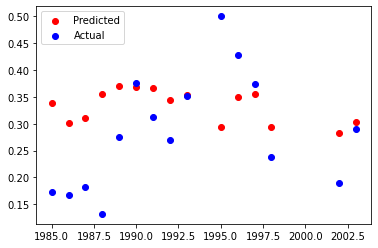

In [36]:
plt.scatter(mj["Year"], mj_predictions, color='r', label="Predicted") 
plt.scatter(mj["Year"], mj["3P%"], color='b', label ="Actual") 
plt.legend(loc="upper left")

Here we are looking at KD's predicted and actual shooting seasons. KD started playing in 2007 so these data points should be similar.

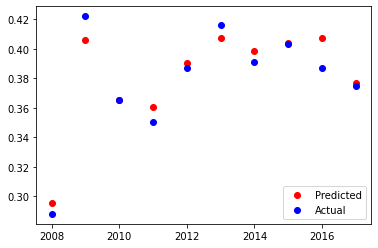

In [38]:
plt.scatter(kd["Year"], kd_predictions, color='r', label="Predicted") 
plt.scatter(kd["Year"], kd["3P%"], color='b', label="Actual") 
plt.legend(loc="lower right")

We can also try using a KNN regression model with various values of K to see how it compares to the Random Forest Regression.

KNN MAE value for k=  1 is: 0.03998496240601504
KNN MAE value for k=  2 is: 0.03476817042606516
KNN MAE value for k=  3 is: 0.03333500417710944
KNN MAE value for k=  4 is: 0.03206328320802005
KNN MAE value for k=  5 is: 0.031885213032581454
KNN MAE value for k=  6 is: 0.03142898913951545
KNN MAE value for k=  7 is: 0.03168313641245972
KNN MAE value for k=  8 is: 0.03143327067669173
KNN MAE value for k=  9 is: 0.031552770815928714
KNN MAE value for k=  10 is: 0.031391228070175435
KNN MAE value for k=  11 is: 0.03160697197539303
KNN MAE value for k=  12 is: 0.03182435254803676
KNN MAE value for k=  13 is: 0.032063042220936956
KNN MAE value for k=  14 is: 0.03251163623344075
KNN MAE value for k=  15 is: 0.03253500417710944
KNN MAE value for k=  16 is: 0.032547775689223055
KNN MAE value for k=  17 is: 0.032699248120300756
KNN MAE value for k=  18 is: 0.03274408242829296
KNN MAE value for k=  19 is: 0.032883128874818625
KNN MAE value for k=  20 is: 0.03292894736842105


<AxesSubplot: >

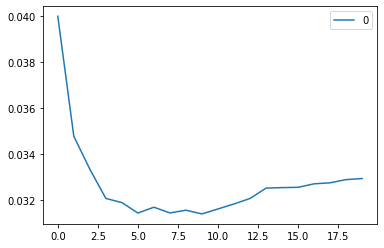

In [47]:
from sklearn import neighbors
from math import sqrt

%matplotlib inline
rmae_val = [] #to store rmae values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_reg_train, y_reg_train)  #fit the model
    pred=model.predict(X_reg_validation) #make prediction on test set
    error = mean_absolute_error(y_reg_validation,pred) #calculate rmse
    rmae_val.append(error) #store rmae values
    print('KNN MAE value for k= ' , K , 'is:', error)
    
#plotting the rmae values against k values
curve = pd.DataFrame(rmae_val) #elbow curve 
curve.plot()

We can see that for KNN regression model, we get a larger MAE than the Random Forest Regression Model. We tested 20 different K values and the lowest MAE was 0.0314 where as the Random Forest MAE yielded 0.02. We can also see that the ideal K value range is somewhere beteeen K=5 and K=10. Overall, Random Forest is the better model for this project.

### Final Analysis (Continued):
From this project, I have learned how to chose a dataset, perform analysis on that data and fix up the data so I can be useable in my research. I learned how to implement AI models and how to chose features for the models. I also learned how to visualize data and results. Specifically regarding this project, I have learned that because the NBA takes more 3-Point shots, people who are good at basketball in other facets will probably be good at #-point shooting. This is why we see MJ's shooting % increase when adjusted for the modern NBA. To answer the original question about Kareem Abdul Jabbar's 3P%, it seems that he would perform about average in the modern NBA when comparing him to his peers. I can justify these answer by performing the model on these spefic players and comparing the results to themselves (real values) and also to their modern NBA peers. As seen from above, the MAE was about .02, which means the resulted value is expected to be +- 2% of the real 3P%. The MSE being very low (.07%) lets us know that the results from the model are not skewed one way or the other. We also looked at the KNN regression model to get a sense of what another model might produce. After trying 20 values of K and their respective MAE values, we can confidently say that Random Forest is a better model for this project. I feel that with these metrics, I can say that my analysis is validated and we can get a good idea of a past player's projected 3P% when adjusted for the modern NBA. This project can serve as a reference point for possible debates or speculation when talking about the legacy of NBA players. Sports in general (especially the NBA) change a lot from generation to generation. Whether this be by rule changes, interest, player health etc. It is important to have tools such as this project to analyze how the sport changes over time to keep meaningful accounts of the past and to plan for the future.